In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3567429ccc3fcaf71cfa32235a63b7e7


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [74]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [73]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 113 | ixtapa
Processing Record 2 of Set 113 | barentsburg
Processing Record 3 of Set 113 | taolanaro
Processing Record 4 of Set 113 | san clemente
Processing Record 5 of Set 113 | vrangel
Processing Record 6 of Set 113 | saint-philippe
Processing Record 7 of Set 113 | busselton
Processing Record 8 of Set 113 | nikolskoye
Processing Record 9 of Set 113 | rikitea
Processing Record 10 of Set 113 | bud
Processing Record 11 of Set 113 | harper
Processing Record 12 of Set 113 | akureyri
Processing Record 13 of Set 113 | ushuaia
Processing Record 14 of Set 113 | butaritari
Processing Record 15 of Set 113 | yumen
Processing Record 16 of Set 113 | vaini
Processing Record 17 of Set 113 | baculin
Processing Record 18 of Set 113 | santa isabel do rio negro
Processing Record 19 of Set 113 | yulara
Processing Record 20 of Set 113 | illoqqortoormiut
Processing Record 21 of Set 113 | punta arenas
Processing Record 22 of Set 113 | atuona
Processing Record 23 of Set 113 | pont

Processing Record 1 of Set 117 | buchanan
Processing Record 2 of Set 117 | port hardy
Processing Record 3 of Set 117 | pochutla
Processing Record 4 of Set 117 | bollnas
Processing Record 5 of Set 117 | oschersleben
Processing Record 6 of Set 117 | harwich
Processing Record 7 of Set 117 | hithadhoo
Processing Record 8 of Set 117 | banjar
Processing Record 9 of Set 117 | novo aripuana
Processing Record 10 of Set 117 | ipora
Processing Record 11 of Set 117 | karasburg
Processing Record 12 of Set 117 | rorvik
Processing Record 13 of Set 117 | mananjary
Processing Record 14 of Set 117 | kodiak
Processing Record 15 of Set 117 | lubango
Processing Record 16 of Set 117 | airai
Processing Record 17 of Set 117 | umzimvubu
Processing Record 18 of Set 117 | cayenne
Processing Record 19 of Set 117 | mahebourg
Processing Record 20 of Set 117 | yongchang
Processing Record 21 of Set 117 | nong khae
Processing Record 22 of Set 117 | sampit
Processing Record 23 of Set 117 | nizhneyansk
Processing Record

Processing Record 1 of Set 121 | touros
Processing Record 2 of Set 121 | necochea
Processing Record 3 of Set 121 | vila franca do campo
Processing Record 4 of Set 121 | benguela
Processing Record 5 of Set 121 | massena
Processing Record 6 of Set 121 | san patricio
Processing Record 7 of Set 121 | vanimo
Processing Record 8 of Set 121 | elko
Processing Record 9 of Set 121 | broome
Processing Record 10 of Set 121 | taoudenni
Processing Record 11 of Set 121 | wahran
Processing Record 12 of Set 121 | saint george
Processing Record 13 of Set 121 | kindu
Processing Record 14 of Set 121 | cassilandia
Processing Record 15 of Set 121 | bandarbeyla
Processing Record 16 of Set 121 | anloga
Processing Record 17 of Set 121 | ilulissat
Processing Record 18 of Set 121 | westport
Processing Record 19 of Set 121 | danielskuil
Processing Record 20 of Set 121 | melfi
Processing Record 21 of Set 121 | pokhara
Processing Record 22 of Set 121 | biak
Processing Record 23 of Set 121 | cornwall
Processing Reco

Processing Record 1 of Set 125 | berberati
Processing Record 2 of Set 125 | iqaluit
Processing Record 3 of Set 125 | sakakah
Processing Record 4 of Set 125 | ormara
Processing Record 5 of Set 125 | comodoro rivadavia
Processing Record 6 of Set 125 | yaan
Processing Record 7 of Set 125 | isla mujeres
Processing Record 8 of Set 125 | clarence town
Processing Record 9 of Set 125 | shibarghan
Processing Record 10 of Set 125 | chara
Processing Record 11 of Set 125 | sisophon
Processing Record 12 of Set 125 | mataram
Processing Record 13 of Set 125 | vvedenskoye
Processing Record 14 of Set 125 | fukue
Processing Record 15 of Set 125 | marsa matruh


In [31]:
# Run an API request for each of the cities.
try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
except:
        print("City not found. Skipping...")
pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Data Retrieval Complete      
-----------------------------


In [75]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gweta,18.2170,-63.0578,77.83,77,5,10.98,AI,2022-02-02 02:52:02
1,Bubaque,2.8197,-60.6733,80.58,65,0,11.50,BR,2022-02-02 03:10:48


In [76]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [77]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

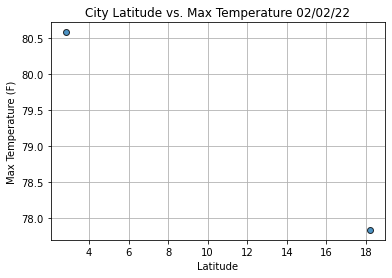

In [78]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

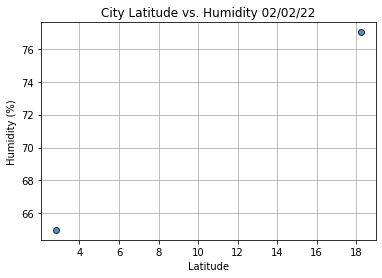

In [79]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

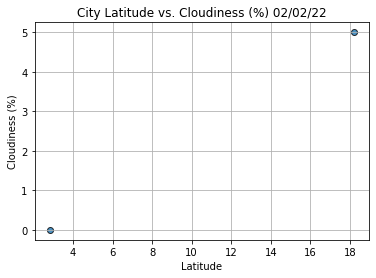

In [80]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

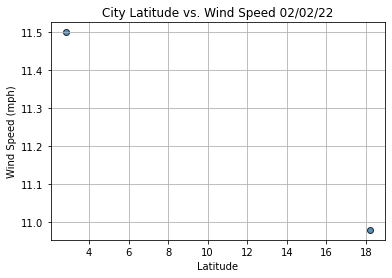

In [81]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [114]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (755688848.py, line 3)

In [83]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [115]:
index13 = city_data_df.loc[13]

KeyError: 13

In [116]:
city_data_df["Lat"] >= 0

0    True
1    True
Name: Lat, dtype: bool

In [117]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gweta,18.2170,-63.0578,77.83,77,5,10.98,AI,2022-02-02 02:52:02
1,Bubaque,2.8197,-60.6733,80.58,65,0,11.50,BR,2022-02-02 03:10:48


In [118]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gweta,18.2170,-63.0578,77.83,77,5,10.98,AI,2022-02-02 02:52:02
1,Bubaque,2.8197,-60.6733,80.58,65,0,11.50,BR,2022-02-02 03:10:48


In [119]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

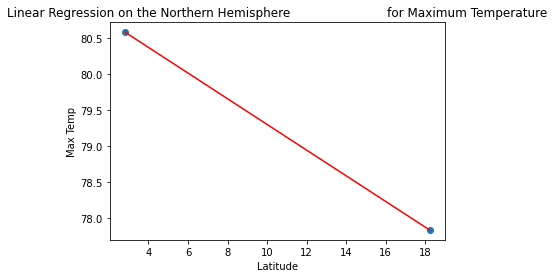

In [120]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [124]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

SyntaxError: EOL while scanning string literal (3837824748.py, line 6)

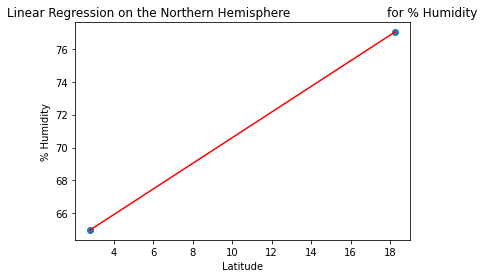

In [125]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [121]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))

ValueError: Inputs must not be empty.

In [126]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

SyntaxError: EOL while scanning string literal (133713784.py, line 6)

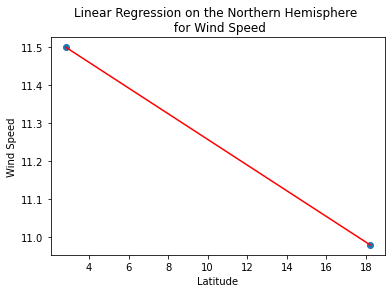

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [127]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

SyntaxError: EOL while scanning string literal (2765030047.py, line 6)